# **Week 3 Activity**

## Description

### *We are going to carry out various Visualizations for the following tasks on Telco Customer Data. Vivid categories of this data helps to analyze the customer database in-depth.*

### Tasks

#### 1) Compare churn count with respect to gender. 
#### 2) Find out how many female senior citizens there in the dataset 
#### 3) Compare 'tenure' with 'Total Charges'
#### 4) Find out which contract preffered by the senior citizen. 
#### 5) Comment on your finds on Payment Method?

### 1) Compare churn count with respect to gender.

In [14]:
# NumPy Library as np
import numpy as np
# Matplot Library - PyPlot as plt
import matplotlib.pyplot as plt
# Pandas Library as pd
import pandas as pd
# Seaborn Library as sns
import seaborn as sns

In [6]:
# Reading the 'Telco-Customer-Churn.xls' file using read_excel()
tc=pd.read_excel('Telco-Customer-Churn.xlsx')
# Displaying the first 5 observations using the head()
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Displaying the last 5 observations using the tail()
tc.tail()
# 7043 observations found!

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0.0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
# Checking for the null values present in the data
tc[tc.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [10]:
# No null values found!

In [12]:
fc=(tc['gender']=='Female').sum()
mc=(tc['gender']=='Male').sum()
mcc = ((tc['gender']=='Male') & (tc['Churn']=='Yes')).sum()
fcc = ((tc['gender']=='Female') & (tc['Churn']=='Yes')).sum()
print("Out of the",fc,"Females,",fcc,"and out of",mc,"Males,",mcc,"subscribers decided to stay in Telco.")

Out of the 3488 Females, 939 and out of 3555 Males, 930 subscribers decided to stay in Telco.


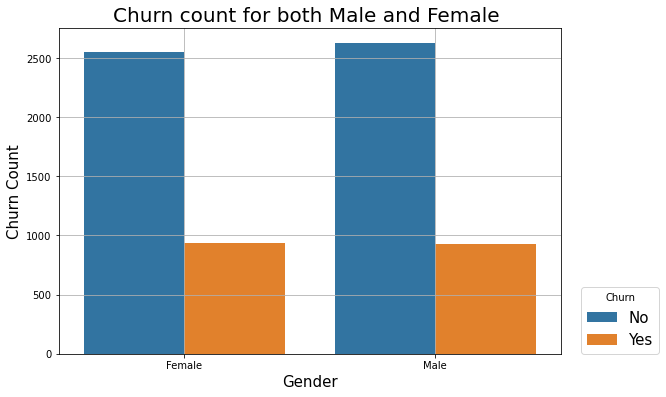

In [17]:
# Plotting a Count Chart with Gender along the X-axis and Churn Count along the Y-axis
plt.figure(figsize = (9,6))
sns.countplot(x='gender',hue='Churn',data=tc)
plt.xlabel("Gender", fontsize='15')
plt.ylabel("Churn Count", fontsize='15')
plt.title("Churn count for both Male and Female ", fontsize='20')
plt.legend(loc=(1.04,0),title="Churn",prop={'size': 15})
plt.grid()
plt.show()

### Insights:

**Most highlighting fact in this analysis is only about a quarter of the customers were decided to stay in Telco. It's same in both gender.**

### 2) Find out how many female senior citizens there in the dataset

In [28]:
# Finding and assigning (to variable 'fcs') the no: of observations, by checking the 'SeniorCitizen' feature having the boolean value 1 and 'gender' feature having value 'Female'.
fcs = ((tc['gender']=='Female') & (tc['SeniorCitizen']== 1)).sum()
print('Out of',fc,'female customers,',fcs,'are senior citizens.')


Out of 3488 female customers, 568 are senior citizens.


### 3) Compare 'tenure' with 'Total Charges'

In [29]:
# Converting the datatype of TotalCharges from Object to Float
tc ['TotalCharges'] = pd.to_numeric(tc['TotalCharges'], errors='coerce')
tc = tc.replace(np.nan, 0, regex=True)

In [30]:
# Selecting 'tenure' and 'TotalCharges' features from the dataset
tc.loc[:,['tenure', 'TotalCharges']]

,tenure,TotalCharges
0,1.0,29.85
1,34.0,1889.50
2,2.0,108.15
3,45.0,1840.75
4,2.0,151.65
...,...,...
7038,24.0,1990.50
7039,72.0,7362.90
7040,11.0,346.45
7041,4.0,306.60


<AxesSubplot:title={'center':'Approximate Average for TotalCharges'}>

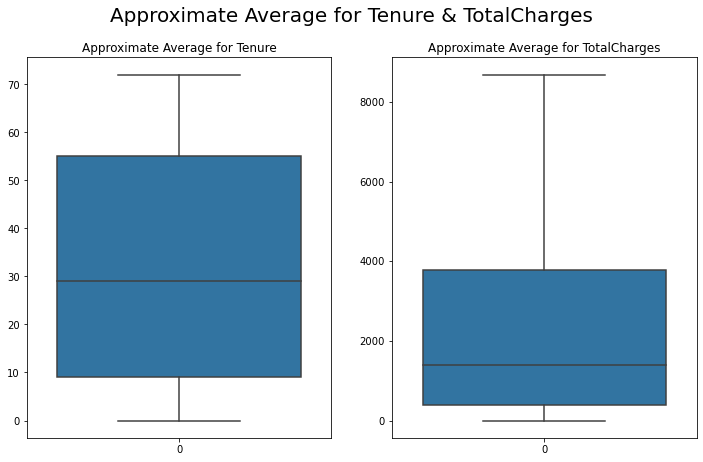

In [33]:
fig, axes = plt.subplots(1,2,figsize=(12,7))
fig.suptitle('Approximate Average for Tenure & TotalCharges',fontsize=20)
axes[0].set_title('Approximate Average for Tenure')
axes[1].set_title('Approximate Average for TotalCharges')
sns.boxplot(ax=axes[0],data=tc['tenure'])
sns.boxplot(ax=axes[1],data=tc['TotalCharges'])

#### The Median for Tenure lies around 29.0
#### The Median for TotalCharges lies around 1394.55

### 4) Find out which contract preffered by the senior citizen.

In [36]:
# Counting the total number of Senior Citizens in the dataset by using sum()
print('The total number of Senior Citizens is',(tc['SeniorCitizen'] == 1).sum())

The total number of Senior Citizens is 1142


In [38]:
# Selecting 'Contract' and 'SeniorCitizen' features where 'SeniorCitizen' feature having boolean value 1, from the dataset
tc.loc[tc['SeniorCitizen'] == 1, ['Contract']].value_counts().to_frame()

,0
Contract,
Month-to-month,807
One year,190
Two year,145


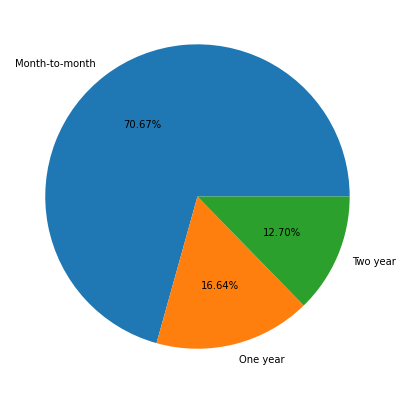

In [39]:
# Plotting Pie chart
fig = plt.figure(figsize=(10,7))
plt.pie(tc.loc[tc['SeniorCitizen'] == 1, ['Contract']].value_counts().to_list(), labels = list(tc['Contract'].unique()),autopct='%1.2f%%')
plt.show()

### Insights:
Among the 1142 Senior Citizens
- senior citizens have chosen 'Month-to-month'
- 190 senior citizens have chosen 'One year'
- 145 senior citizens have chosen 'Two year'

**Most widely used contract is Month-to-Month**

### 5) Comment on your finds on Payment Method?

In [40]:
# Counting the different Payment Method parameters by using value_counts()
(tc['PaymentMethod']).value_counts().to_frame()

,PaymentMethod
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


Text(0, 0.5, 'Frequency')

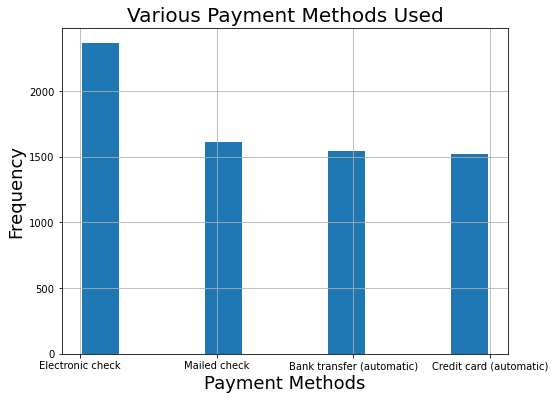

In [44]:
# Plotting a Histogram with the Various Payment Methods along the x-axis and their Frequency along the y-axis
plt.figure(figsize=(8,6))
(tc['PaymentMethod']).hist(rwidth=0.9)
plt.title("Various Payment Methods Used",fontsize=20)
plt.xlabel('Payment Methods', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

### Insights:
Among the 7043 customers,

- 2365 opted 'Electronic check' Payment Method
- 1612 opted 'Bank transfer (automatic)' Payment Method
- 1522 opted 'Credit card (automatic)' Payment Method

**Most widely used Payment method is Electonic check**